# Math 5031
## Home Work  3
### MingxuanJiang 5588030
**Due:  Friday, October 2




Collarborated with HaoChen, JingyiLi and HanlinDing

1.  Consider a swap curve given by


|Term|BEY%|
|---|---|
|1|3.00|
|2|3.25|
|3|3.65|
|5|4.00|
|7|4.50|
|10|5.00|
|20|4.50|
|30|4.20|


a) Use a bootstrapping routine to determine the par curve and the spot curve.

b) Determine the fair coupon for 10 in 5 forward starting swap.

c) Determine the forward price of 10 year bond paying $5.00\% BEY$ coupons to be purchased in five year.  That is, the bond pay coupons starting in year 5 and redeems at year 15. 


d) What should the coupon be so that the price is $100$ (i.e. at par)?



In [1]:
import numpy as np
from matplotlib import pyplot as plt

a) Use a bootstrapping routine to determine the spot curve.

I use the same function of HW1

In [2]:
def simplebootstrap(mats, par_yields):
    
    
    #  This is not always needed, but sometimes helpful
    mats = np.array(mats)
    mats = mats.flatten()
    par_yields = np.array(par_yields)
    par_yields = par_yields.flatten()  
    #
    
    
    firstmat = mats[0]
    lastmat = mats[-1]  #mats should be fed in in order.
    
    times = np.arange(0.5, lastmat+.5, 0.5)
    
    
    if mats[0] > 0.5:  #in case first par yield is not 6 months
        
        earlymats = np.arange(0.5,firstmat,.5)
        
        mats = np.append(earlymats,mats)
        
        earlypars = np.ones((1,2*firstmat -1)) * par_yields[0]
        earlypars = earlypars.flatten()
        par_yields = np.append(earlypars, par_yields)
        
    
    bey_interp = np.interp(times,mats,par_yields)
    
    # Make the coupon matrix
    
    C = np.kron(np.ones((len(bey_interp),1)),bey_interp).T /2
    
    
    C = np.tril(C) + np.eye(len(bey_interp))
    
    
    pars = np.ones((len(bey_interp),1))
    # solve matrix equation
    
    ZCB = np.matmul(np.linalg.inv(C),pars).flatten()
    
    
    spots = -np.log(ZCB) *  1/times
    
    return ZCB, spots
    

    

In [3]:
mats = np.array([1,2,3,5,7,10,20,30])
par_yields = np.array([.03,.0325,.0365,.04,.045,.05,.045,.042])
Z, rates = simplebootstrap(mats, par_yields)

Spot Curve: [0.02977722 0.02977722 0.03102772 0.03228422 0.03431373 0.03635862
 0.037245   0.03814173 0.03904846 0.03996523 0.04130501 0.04266063
 0.04403378 0.04542621 0.04634641 0.0472812  0.0482312  0.04919721
 0.05018012 0.05118097 0.05076613 0.0503601  0.04996145 0.04956902
 0.04918184 0.04879908 0.04842005 0.04804417 0.04767094 0.04729993
 0.04693079 0.04656321 0.04619691 0.04583169 0.04546734 0.04510371
 0.04474066 0.04437807 0.04401586 0.04365393 0.04344484 0.04323475
 0.04302367 0.04281159 0.0425985  0.04238442 0.04216935 0.04195328
 0.04173624 0.04151823 0.04129926 0.04107935 0.04085851 0.04063676
 0.04041413 0.04019062 0.03996627 0.03974109 0.03951511 0.03928836]


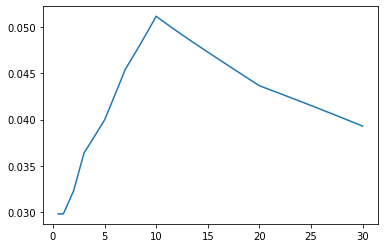

In [4]:
print('Spot Curve:',rates)
plt.plot(np.arange(0.5,30.1,0.5), rates)

b) Determine the fair coupon for 10 in 5 forward starting swap.
$$c = 2\frac{1 - Z(t;t_1,t_1 + T)}{\Sigma_{k=1}^{2T} Z(t;t_1,t_1 + 0.5K)}$$
where $$t=0,t_1=5,T=10$$
It also can be written as
$$S(t;t_{start}, t_{end}) = 2\frac{Z(t,t_{start})- Z(t,t_{end})}{A_2(t,t_{start},t_{end})}$$

In [5]:
c = 2*(Z[2*5-1]-Z[2*15-1])/sum(Z[10:30])
print('The fair coupon is',c)

The fair coupon is 0.05300527218751756


c) Determine the forward price of 10 year bond paying $5.00\% BEY$ coupons to be purchased in five year.  That is, the bond pay coupons starting in year 5 and redeems at year 15. 

In [6]:
cfs3 = 0.05/2*np.ones((10*2,1)).flatten()
cfs3[-1] += 1
value3 = np.inner(cfs3,Z[10:30])
print('The forward price is',value3*100)

The forward price is 80.03339672063703


d) What should the coupon be so that the price is $100$ (i.e. at par)?

In [7]:
c = 2*(1-Z[2*15-1])/sum(Z[10:30])
print('The coupon is',c)

The coupon is 0.08236672385427805


Verify the price

In [8]:
cfs4 = c/2*np.ones((10*2,1)).flatten()
cfs4[-1] += 1
value4 = np.inner(cfs4,Z[10:30])
print('The forward price is',value4*100)

The forward price is 100.00000000000003


2. Using the same yield curve as in question 1. A 5 in 10 forward starting payor swap is entered into at zero cost.

    a) What is the fixed coupon?
    
    b) Immediataly after agreeing to the swap, rate increase (parallel) by 100 basis points. What is the value of the swap?
    
    c) Suppose instead the curve "tilts" around the 10 year point. That is, the yield curve shock according to\ $$r(0,t) \rightarrow \delta(t)$$ where 
    
   $$\delta(t) = .001(t - 10)$$
   
   What is the value of the swap now?


a) What is the fixed coupon?

In [9]:
c2 = 2*(Z[2*10-1]-Z[2*15-1])/sum(Z[20:30])
print('The fixed coupon is',c2)

The fixed coupon is 0.04004087935801911


b) Immediataly after agreeing to the swap, rate increase (parallel) by 100 basis points. What is the value of the swap?

$$Fixed = \frac{c}{2}  \sum_{k=1}^{2T} Z(t,t_1+\frac{k}{2})$$
$$floating(t1) = Z(t,t_1)- Z(t, t_1 + T)$$

In [10]:
rates2b = rates+0.01
times2b = np.arange(0.5,30.1,0.5)
Zcb2b = np.exp(-times2b*rates2b)
# fixed leg
fixedleg = c2/2*sum(Zcb2b[20:30])
print('fixed leg',fixedleg)
# floating leg
floatingleg = Zcb2b[19] - Zcb2b[29]
print('floating leg',floatingleg)
swapvalue = floatingleg - fixedleg
print('The value of the swap is',swapvalue*100)

fixed leg 0.09473486936869052
floating leg 0.11899430313164483
The value of the swap is 2.4259433762954306


c) Suppose instead the curve "tilts" around the 10 year point. That is, the yield curve shock according to\ $$r(0,t) \rightarrow  r(0,t) + \delta(t)$$  where 
    
   $$\delta(t) = .001(t - 10)$$
   
   What is the value of the swap now?


In [11]:
rates2c = rates + 0.001*(times2b-10)
Zcb2c = np.exp(-times2b*rates2c)
# fixed leg
fixedleg = c2/2*sum(Zcb2c[20:30])
print('fixed leg',fixedleg)
# floating leg
floatingleg = Zcb2c[19] - Zcb2c[29]
print('floating leg',floatingleg)
swapvalue = floatingleg - fixedleg
print('The value of the swap is',swapvalue*100)

fixed leg 0.10375591088889032
floating leg 0.14306155520386665
The value of the swap is 3.9305644314976336


3. Suppose your projected cash flows (from your business) are as follows: For 10 years you will have negative cash flows of $100$| at the end of the year. For the next 20 years beyond that you will have positive cash flows
of $500 at the end of the year.

a) Using the yield curve from ex. 1, what the value of your business?

b) What is the dollar duration of your business value?

c) Determine the notional of a 10 year swap you would use to immunize the value of your businees from interest rate changes.  Will this be a payor or recievor swap?

d)For the "tilt" shock described in ex. 2, evaluate how well your hedge worked.



a) Using the yield curve from ex. 1, what the value of your business?

In [12]:
cfs3a = np.ones(30*2).flatten()
cfs3a[0:10*2] = -100
cfs3a[20:] = 500
cfs3a[::2] = 0
print(cfs3a)
value3a = np.inner(cfs3a,Z)
print('The value is',value3a)

[   0. -100.    0. -100.    0. -100.    0. -100.    0. -100.    0. -100.
    0. -100.    0. -100.    0. -100.    0. -100.    0.  500.    0.  500.
    0.  500.    0.  500.    0.  500.    0.  500.    0.  500.    0.  500.
    0.  500.    0.  500.    0.  500.    0.  500.    0.  500.    0.  500.
    0.  500.    0.  500.    0.  500.    0.  500.    0.  500.    0.  500.]
The value is 3408.9440558183965


b) What is the dollar duration of your business value?

In [13]:
times3b = np.arange(0.5,30.1,0.5)
Dur = np.inner(Z,times3b*cfs3a)/value3a
DDur = Dur*value3a
print('The dollar duration is',DDur)

The dollar duration is 77519.20281910631


c) Determine the notional of a 10 year swap you would use to immunize the value of your businees from interest rate changes.  Will this be a payor or recievor swap?

In [14]:
times = np.arange(0.5,30.1,0.5)
times3c = np.arange(0.5,10.1,0.5)
Zcb3c = np.exp(-rates*times)
swaprate = 2*(1-Z[10*2-1])/sum(Z[0:20])
print('swaprate',swaprate)

swaprate 0.049999999999999996


In [15]:
cfs3c = swaprate/2*np.ones([20])
cfs3c[-1] += 1
Dur10 = np.inner(times3c*cfs3c,Zcb3c[0:20])/np.inner(cfs3c,Zcb3c[0:20])
print('The duration is',Dur10)

The duration is 7.924708699518062


In [16]:
DDS = Dur10 - 0.25
print(DDS)

7.674708699518062


In [17]:
print('The notional is',DDur/DDS)

The notional is 10100.605228700626


The dollar duration is positive. And when the interest rate rises, the value of business rises. So in order to decrease the impact of interest rate, it is a payor swap.

d)For the "tilt" shock described in ex. 2, evaluate how well your hedge worked.

In [32]:
rates3d = rates + 0.001*(times-10)
Zcb3d = np.exp(-times*rates3d)
# fixed leg
fixedleg = swaprate/2*sum(Zcb3d[0:20])
print('fixed leg',fixedleg)
# floating leg
floatingleg = 1 - Zcb3d[19]
print('floating leg',floatingleg)
swapvalue = (floatingleg-fixedleg)*DDur/DDS
print('The value of the swap',swapvalue)

value = np.inner(cfs3a,Zcb3d)
print('The value of the business',value)
print('The change of the business', value-value3a)

fixed leg 0.4074209010504016
floating leg 0.4005901546528221
The value of the swap -68.99467277931913
The value of the business 2631.4132198704956
The change of the business -777.5308359479009


We can notice that the value of swap isn't equal to the change value of the business. So the hedge doesn't work.